# Данные о развитии игровой индустрии в 2000-2013 годах. Предварительный анализ и обработка. 

- Автор: Брыковская Наталья
- Дата: 13.11.2024

### Цели и задачи проекта <a class="tocSkip">

<font color='#777778'>
Цель проекта: 
    
 - получение среза обработанных данных об игровой индустрии из открытых источников за период с 2000 по 2013 год.

Полученные данные планируют использовать в дальнейшем для изучения развития игровой индустрии игр: обзора игровых платформ, объема продаж игр разных жанров и региональные предпочтения игроков. 
Задачи проекта:
 - знакомство и проверка корректности данных;
 - предобработка данных
 - выделить три категории оценок данных.
</font>

### Описание данных <a class="tocSkip">

<font color='#777778'>
Данные представлены в одном файле. Это исторические данные, которые получены из открытых источников и содержат информацию о продажах игр разных жанров и платформ, а также пользовательские и экспертные оценки игр.

    Файл 'new_games.csv' содержит:
 - `Name` — название игры.
 - `Platform` — название платформы.
 - `Year of Release` — год выпуска игры.
 - `Genre` — жанр игры.
 - `NA sales` — продажи в Северной Америке (в миллионах проданных копий).
 - `EU sales` — продажи в Европе (в миллионах проданных копий).
 - `JP sales` — продажи в Японии (в миллионах проданных копий).
 - `Other sales` — продажи в других странах (в миллионах проданных копий).
 - `Critic Score` — оценка критиков (от 0 до 100) - целое число.
 - `User Score` — оценка пользователей (от 0 до 10) - число с плавающей точкой.
 - `Rating` — рейтинг организации ESRB (англ. Entertainment Software Rating Board). 
    
    ESRB - ассоциация, которая определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</font>

### Содержимое проекта <a class="tocSkip">

<font color='#777778'>

 1.  Загрузка и знакомство с данными. Пользовательские функции.  
    
 2. Проверка ошибок в данных и их предобработка  
    
 3. Фильтрация данных       
    
 4. Категоризация данных 
    
 5. Итоги
    
</font>

---

## 1. Загрузка и знакомство с данными. Пользовательские функции.<a class="tocSkip">

Загрузим необходимые библиотеки Python. 
    
Загрузим данные из файла `/datasets/new_games.csv` в датафрейм df.  Для сравнения Выведем несколько случайных строк для визуальной оценки загруженных данных. Создадим копию датафрейма raw data. Эти данные останутся неизменными, чтобы можно было подсчитать значения, которые потерялись при очистке.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
# Математика
import numpy as np

#снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)
#формат вывода количества знаков после запятой по умолчанию
pd.set_option('display.float_format', '{:.2f}'.format)
# игнорируем предупреждения
pd.set_option('chained_assignment', None)

# Графики
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault

In [2]:
# записываем CSV-файл в объект DataFrame
df = pd.read_csv('/datasets/new_games.csv')
# создадим копию датафрейма с сырыми данными
raw_data = df.copy(deep = True)

# выведем случайные 5 строк датафрейма
df.sample(5, random_state=1)

,Name,Platform,Year of Release,Genre,NA sales,EU sales,JP sales,Other sales,Critic Score,User Score,Rating
9596,Diablo II,PC,2000.00,Role-Playing,0.01,0.1,0.0,0.02,88.00,8.8,M
1253,Call of Duty: Modern Warfare: Reflex Edition,Wii,2009.00,Shooter,0.94,0.43,0.0,0.14,NaN,NaN,NaN
6405,Rory McIlroy PGA Tour,XOne,2015.00,Action,0.16,0.09,0.0,0.02,60.00,4.3,E
10264,WWE All Stars,PS2,2011.00,Fighting,0.05,0.04,0.0,0.01,NaN,3.4,T
8157,Zumba Fitness Rush,X360,2012.00,Sports,0.00,0.16,0.0,0.02,73.00,6.2,E10+


In [3]:
#смотрим форму датафрейма
print(f'Строк: {df.shape[0]}, столбцов: {df.shape[1]}')

Строк: 16956, столбцов: 11


Данные успешно загружены в датафрейм `df`. Имеем `16956` строк данных и `11` столбцов. <br>
Уже на 5 случайных строках видно, что есть пропуски, есть несоответствие типа данных его содержимому
(год представлен не как целое число). <br>

In [4]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16954 non-null  object 
 1   Platform         16956 non-null  object 
 2   Year of Release  16681 non-null  float64
 3   Genre            16954 non-null  object 
 4   NA sales         16956 non-null  float64
 5   EU sales         16956 non-null  object 
 6   JP sales         16956 non-null  object 
 7   Other sales      16956 non-null  float64
 8   Critic Score     8242 non-null   float64
 9   User Score       10152 non-null  object 
 10  Rating           10085 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


Видим, что обязательно нужна предобработка данных - есть пропуски и несоответствие типов данных по столбцам их содержимому.<br>

Приступим к проверке и предобработке полученных данных и ближе познакомимся с его содержимым. Но сначала пропишем все пользовательские функции, которые потребуются для работы с данными.

## Функции <a class="tocSkip">
### Функции для замены типа данных в столбцах<a class="tocSkip">
Напишем две функции для преобразования типов данных с помощью функций Pandas `pandas.to_numeric()`  и  `astype()`
#### Функция astype_dfr     <a class="tocSkip">|

In [5]:
# astype_dfr      
def astype_dfr(col, dfr=df, astype_col='Int16', err='ignore'):
    """
    Производит замену типа данных с помощью встроенной функции astype() в определенной колонке датафрейма.
    Считает не пустые строки в столбце и определяет тип данных до замены и после, результат выводит. 
    параметры:
        col - аргумент требует указания столбца датафрейма в виде строки (в кавычках)
        dfr - аргумент с указанием датафрейма, значение по умолчанию df
        astype_col - аргумент требует указания типа данных в виде строки (в кавычках), значение по умолчанию 'Int16'
        err - аргумент требует указания 
    """
    print(f"До преобразования не пустых строк в столбце {[col]}:    {dfr[col].count()} и тип данных: {dfr[col].dtypes}")
    
    dfr[col] = dfr[col].astype(astype_col, errors=err)
    
    print(f"После преобразования не пустых строк в столбце {[col]}: {dfr[col].count()} и тип данных: {dfr[col].dtypes}")

#### Функция to_numeric_dfr  <a class="tocSkip">|

In [6]:
# to_numeric_dfr
def to_numeric_dfr(col, dfr=df, err='coerce', dwncst='integer'):
    """
    Производит замену типа данных с помощью встроенной функции to_numeric() в определенной колонке датафрейма.
    Считает не пустые строки в столбце и определяет тип данных до замены и после, результат выводит. 
    параметры:
        col - аргумент требует указания столбца датафрейма в виде строки (в кавычках)
        dfr - аргумент с указанием датафрейма, значение по умолчанию df
        err - аргумент требует указания аргумента errors в кавычках,значение по умолчанию 'coerce'
        dwncst - аргумент требует указания аргумента downcast в кавычках,значение по умолчанию 'integer'
    """
    print(f"До преобразования не пустых строк в столбце {[col]}:    {dfr[col].count()} и тип данных: {dfr[col].dtypes}")
    
    dfr[col] = pd.to_numeric(dfr[col], errors=err)
    
    print(f"После преобразования не пустых строк в столбце {[col]}: {dfr[col].count()} и тип данных: {dfr[col].dtypes}")

### Функции  для поиска, замены пропусков в столбцах<a class="tocSkip">
Напишем функции:
 - для поиска пропусков в датафрейме reserch_na(dfr) 
 - для удаления пропусков dropna_dfr(col, dfr=df).

#### Функция reserch_na для поиска пропусков <a class="tocSkip">

In [7]:
# функция reserch_na
def reserch_na(dfr):
    print(f"Всего датасет содержит {dfr.isnull().values.sum()} пропусков.\n=========================================")
    print('Пропусков в каждом из столбцов:\n=========================================')
    print(dfr.isna().sum(),'\n=========================================')
    print('Процент пропусков в каждом из столбцов:\n=========================================')
    for col in dfr.columns:
        pct_missing = np.mean(dfr[col].isnull())
        print('{} - {}%'.format(col, (pct_missing*100).round(2)))
    #print((dfr.isna().sum() / len(dfr)*100).round(2)) 

####  Функция fillna_dfr для замены пропусков в столбцах <a class="tocSkip">   

In [8]:
# функция fillna_dfr
def fillna_dfr (col, dfr=df, fill='unknown'):
    """
    Производит замену пропусков с помощью встроенной функции fillna() в определенной колонке датафрейма.
    После, результат выводит. 
    параметры:
        col - аргумент требует указания столбца датафрейма в виде строки (в кавычках)
        dfr - аргумент с указанием датафрейма, значение по умолчанию df
        fill - аргумент требует указания значения на которое меняем пропуски, значение по умолчанию 'Int16'
    """
    dfr[col] = dfr[col].fillna(fill)
    if dfr[col].isnull().sum() == 0:
        print(f"В столбце {[col]} пропуски успешно заполнены значением '{fill}'!")
    else:
        print('Ahtung! Что-то пошло не так. Требуется проверка!')

---

## 2.  Проверка ошибок в данных и их предобработка <a class="tocSkip">


### 2.1. Названия, или метки, столбцов датафрейма: <a class="tocSkip">

Выведем на экран названия всех столбцов датафрейма и проверим их стиль написания. 


In [9]:
#выведем список с названиями колонок
list(df.columns)

['Name',
 'Platform',
 'Year of Release',
 'Genre',
 'NA sales',
 'EU sales',
 'JP sales',
 'Other sales',
 'Critic Score',
 'User Score',
 'Rating']

Приведем все столбцы к стилю `snake case`, когда названия в нижнем регистре, а вместо пробелов — подчёркивания.

In [10]:
#сменим регистр у столбцов на нижний  помощью генералтора списка/list comprehensions
df.columns = [x.lower() for x in df.columns]

#заменим пробелы на _ в названии столбцов
df.columns = df.columns.str.replace(' ', '_')
print('Столбцы после приведения их к единому стилю snake case:\n', list(df.columns))
#df.columns

Столбцы после приведения их к единому стилю snake case:
 ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


### 2.2. Типы данных: <a class="tocSkip">

Выведем сводную информацию о датафрейме, включая число ненулевых значений, типы данных по столбцам и общее число элементов, среди которых и количество столбцов.Используем для этого метод info(). Также метод позволяет обнаружить столбцы с отсутствующими значениями.

In [11]:
#смотрим на датафрейм методом info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16954 non-null  object 
 1   platform         16956 non-null  object 
 2   year_of_release  16681 non-null  float64
 3   genre            16954 non-null  object 
 4   na_sales         16956 non-null  float64
 5   eu_sales         16956 non-null  object 
 6   jp_sales         16956 non-null  object 
 7   other_sales      16956 non-null  float64
 8   critic_score     8242 non-null   float64
 9   user_score       10152 non-null  object 
 10  rating           10085 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


In [12]:
#столбцов с обпределенным топом данных в датафрейме
df.dtypes.value_counts()

object     7
float64    4
dtype: int64

Тип данных `object` содержат 7 столбцов:
 - name       
 - platform   
 - genre      
 - eu_sales   
 - jp_sales   
 - user_score 
 - rating  
Столбец `user_score` содержит значения оценок пользователей от 0 до 10, представленные числом с плавающей точкой, что требует приведения к соответствующему типу данных.<br>
Столбцы `eu_sales и jp_sales` содержат данные о продажах, представленных числом с плавающей точкой. Это требует приведения типа данных к соответствующему типу данных.<br>
А вот остальные 3 столбца с типом данных `object` содержат в себе строковые данные, что корректно для типа данных `object`.<br>
Тип данных `float64` содержат 4 столбца: 
 - year_of_release
 - na_sales       
 - other_sales    
 - critic_score<br>
В этих столбцах представлены числовые значения. При этом данные, содержащиеся в столбцах `year_of_release` и `critic_score` подразумевают хранение целых чисел, что требует замены типа данных с числа с плавающей точкой  на целочисленный тип.<br>
Заменим тип данных в столбцах: 
 - `user_score` с object на  integer, 
 - `eu_sales` с object на  integer, 
 - `jp_sales` с object на  integer, 
 - `year_of_release` с float64 на integer 
 - `critic_score` с float64 на integer 

В столбцах `user_score`, `eu_sales`,  `jp_sales`тип данных `object`, при этом предполагается, что там число. Возможно в данных есть строковые данные, поэтому при записи в датафрейм столбцу и был присвоен такой тип данных. Выведем уникальные значения столбца, чтобы проверить гипотезу о наличии строковых данных в столбце.

In [13]:
for column in ['user_score', 'eu_sales', 'jp_sales']:
    print(f"Уникальные значения столбца {[column]}:\n\
==========================================================================\n\
{df[column].sort_values().unique()}")

Уникальные значения столбца ['user_score']:
['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]
Уникальные значения столбца ['eu_sales']:
['0.0' '0.01' '0.02' '0.03' '0.04' '0.05' '0.06' '0.07' '0.08' '0.09'
 '0.1' '0.11' '0.12' '0.13' '0.14' '0.15' '0.16' '0.17' '0.18' '0.19'
 '0.2' '0.21' '0.22' '0.23' '0.24' '0.25' '0.26' '0.27' '0.28' '0.29'
 '0.3' '0.31' '0.32' '0.33' '0.34' '0.35' '0.36' '0.37' '0.38' '0.39'
 '0.4' '0.41' '0.42' '0.43' '0.44' '0.45' '0.46' '0.47' '0.48' '0

Гипотеза о наличии строковых данных в столбцах подтвердилась. 

`'user_score'` помимо числовых значений, содержит пропуски и строку `tbd`. Из открытых источников найдена расшифровка tbd - To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе дата выхода. В нашем случае такая аббревиатура применена к данным об оценке пользователя. Это значит что есть обещание провести такую оценку, но по факту данных о такой оценке нет. Можно смело приравнять такое обещание к пропуску. Ведь заменить это значение на какое-то число или ноль будет некорректно. У нас нет информации об оценке игроков и взять ее негде.

`'jp_sales'` и  `'eu_sales'` помимо числовых значений, содержит строку `unknown`. Такое сообщение равносильно пропуску.

В дальнейшем к столбцам нужно применить метод to_numeric с атрибутом errors='coerce', это позволить заменить на пропуски текстовые значения. И уже потом принимать решения о том, что делать с пропусками в данных полях.

####  Заменим типы данных в столбцах<a class="tocSkip">
Применим функции для столбцов, в которых нужно поменять данные.<br>
 - для столбца `year_of_release` датафрейма df  вызовем функцию astype_dfr;
 - для столбца `critic_score` датафрейма df  вызовем функцию to_numeric_df.
 - для столбца `user_score` датафрейма df  вызовем функцию to_numeric_dfr, она в том числе позволит избавиться от строковых данных, заменив их на пропуски;
 - для столбца `jp_sales` датафрейма df  вызовем функцию to_numeric_dfr, она в том числе позволит избавиться от строковых данных, заменив их на пропуски;
 - для столбца `eu_sales` датафрейма df  вызовем функцию to_numeric_dfr, она в том числе позволит избавиться от строковых данных, заменив их на пропуски;
        

In [14]:
#применим функцию astype_dfr к столбцу year_of_release
astype_dfr('year_of_release')    

До преобразования не пустых строк в столбце ['year_of_release']:    16681 и тип данных: float64
После преобразования не пустых строк в столбце ['year_of_release']: 16681 и тип данных: Int16


In [15]:
#применим функцию to_numeric_dfr к столбцу critic_score
to_numeric_dfr('critic_score')

До преобразования не пустых строк в столбце ['critic_score']:    8242 и тип данных: float64
После преобразования не пустых строк в столбце ['critic_score']: 8242 и тип данных: float64


In [16]:
#применим функцию to_numeric_dfr к столбцу user_score
to_numeric_dfr('user_score')

До преобразования не пустых строк в столбце ['user_score']:    10152 и тип данных: object
После преобразования не пустых строк в столбце ['user_score']: 7688 и тип данных: float64


In [17]:
#применим функцию to_numeric_dfr к столбцу jp_sales
to_numeric_dfr('jp_sales')

До преобразования не пустых строк в столбце ['jp_sales']:    16956 и тип данных: object
После преобразования не пустых строк в столбце ['jp_sales']: 16952 и тип данных: float64


In [18]:
#применим функцию to_numeric_dfr к столбцу jp_sales
to_numeric_dfr('eu_sales')

До преобразования не пустых строк в столбце ['eu_sales']:    16956 и тип данных: object
После преобразования не пустых строк в столбце ['eu_sales']: 16950 и тип данных: float64


In [19]:
# выводим результат преобразования во всех столбцах
df[['year_of_release','critic_score','user_score', 'jp_sales', 'eu_sales']].dtypes

year_of_release      Int16
critic_score       float64
user_score         float64
jp_sales           float64
eu_sales           float64
dtype: object

Результаты замены:
 - `user_score` было `10152` строк, а после изменения типа даных стало `7688` не пустых строк. Это значит, что строковых данных `tbd` в столбце было почти `2,5 тыс`. После  приведения к числовому типу данных, строковые значения были заменены на пропуски.
 - `jp_sales`было `16956` строк, а после изменения типа даных стало `16952` не пустых строк. Это значит, что строковых данных в столбце было немного, всего 4 шт, теперь это пропуски.
 - `eu_sales`было `16956` строк, а после изменения типа даных стало `16950` не пустых строк, всего 6 строк было в виде строковых данных, которые были заменены на пропуски.
 - `critic_score` и `year_of_release` - поменяли тип данных на  `integer`. Количество строк осталось неизменных, т.к. в них не было строковых данных.

### 2.3. Наличие пропусков в данных:  <a class="tocSkip">

Посчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях, используем для этого написанную функцию reserch_na(df).

In [20]:
reserch_na(df)

Всего датасет содержит 25142 пропусков.
Пропусков в каждом из столбцов:
name                  2
platform              0
year_of_release     275
genre                 2
na_sales              0
eu_sales              6
jp_sales              4
other_sales           0
critic_score       8714
user_score         9268
rating             6871
dtype: int64 
Процент пропусков в каждом из столбцов:
name - 0.01%
platform - 0.0%
year_of_release - 1.62%
genre - 0.01%
na_sales - 0.0%
eu_sales - 0.04%
jp_sales - 0.02%
other_sales - 0.0%
critic_score - 51.39%
user_score - 54.66%
rating - 40.52%


Больше всего пропусков в трех столбцах:
 - critic_score       51.39%
 - user_score         54.66%
 - rating             40.52%
Причина пропусков скорее всего связана с отсутствием требуемой информации в открытых источниках, а поиск проводился именно из открытых источников. Также оценка критиков, оценка пользователей или оценка  рейтинг организацией ESRB могла и вовсе никогда не проводиться по игре.
Например, ESRB была основана в 1994 [году](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board), а данные в датасете с 1993 года.

Выведем 10 случайных строк датафрейма и посмотрим пропуским в трех столбцах: `critic_score`  `user_score`  `user_score`.

In [21]:
df.sample(10, random_state=2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6482,MotionSports: Adrenaline,X360,2011,Sports,0.14,0.10,0.00,0.03,41.00,7.40,E
14629,Nishijin Pachinko Monogatari 2,SNES,1996,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16631,Rainbow Islands: Revolution,PSP,2005,Action,0.01,0.00,0.00,0.00,NaN,NaN,NaN
3302,Start the Party!,PS3,2010,Misc,0.07,0.41,0.00,0.13,NaN,NaN,NaN
2132,NBA 2K10,X360,2009,Sports,0.88,0.02,0.00,0.08,82.00,7.60,E
7173,Tales of Berseria,PS4,2016,Role-Playing,0.00,0.00,0.23,0.00,NaN,NaN,T
14461,Shining Stars,DS,2008,Action,0.03,0.00,0.00,0.00,NaN,NaN,NaN
9514,Army Men: Green Rogue,PS2,2001,Action,0.06,0.05,0.00,0.02,39.00,3.80,T
559,Call of Duty 3,X360,2006,Shooter,1.49,0.92,0.02,0.27,82.00,6.50,T
13811,Praetorians,PC,2003,Strategy,0.00,0.04,0.00,0.00,78.00,8.20,T


Случайные строки показали, что год релиза(`year_of_release`), платформа (`platform`) и жанр(`genre`) у игр разный. 
Если такие данные и есть где-то, то заполнять эти данные не целесообразно из-за большой трудоемкости без гарантии успеха. Скорее всего такая оценка не проводилась.

Необходимо принять решение о том, что же делать с таким количеством пропусков, ведь удалить строки без влияния на весь набор данных не получится. Замена на ноль  некорректна, так как оценки 0 не равнозначна отсутствию такой оценки. Да и если столбец будет участвовать в расчетах, например среднего, то замененное значение повлияет на результат, даже если заменим на 0. Метод заполнения с помощью последнего непропущенного значения в прямом и обратном порядке также не подходит - оценка игры никак не зависит от соседних значений сверху или снизу. 

Принято решение оставить пропуски в столбце `critic_score`, `user_score`. Отсутствие информации - тоже информация в данном случае. Значение nan в этих колонках не будет мешать расчету показателей. 
В столбце `rating` значения промаркированы текстом. Для дальнейшего удобства восприятия информации заполним все пропуски в столбце `rating` значением `unknown`. Используем для этого ранее написанную пользовательскую функцию `fillna_df`.

In [22]:
# замена пропусков в столбце 'rating'
fillna_dfr('rating', df, 'unknown')

В столбце ['rating'] пропуски успешно заполнены значением 'unknown'!


Теперь посмотрим на пропуски в столбцах `name`,  `genre` и `year_of_release`. 

In [23]:
#пропуски в столбце
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
661,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14439,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


- Две строки сочетают в себе все существующие пропуски в столбцах `name`,  `genre`. Для исследования важен год выхода игры, а также её название. Идентифицировать жанр игры без названия не удастся. А название по году и платформе также не найти, ведь в 1993 году было много крутых игр на Sega Genesis (platform 'GEN').

Пропусков 0,01% удалим эти две строки в столбце `name`, что избавит и от пропусков в столбце `genre`.

- Что касается года выпуска игры - пропуски по столбцу `year_of_release`, то для заполнения этих данных, потребовалось бы отдельное исследование и поиск информации с негарантированным результатом. Это не целесообразно в рамка настоящего проекта. 
Заполнить пропуски каким-то общим значением в данном случае не получится.

Учитывая, что пропусков менее 2%, а данные по этим пропущенным столбцам важны для исследования, то и эти строки с пропусками в столбце `year_of_release` удалим. 

In [24]:
#удаляем пропуски в столбцах 'name', 'year_of_release'
df = df.dropna(subset=['name', 'year_of_release'])
for column in ['name', 'year_of_release']:
    if df[column].isnull().sum() == 0:
        print(f'Пропуски в столбце {[column]} удалены успешно!')
    else:
        print('Ahtung!!! Пропуски не удалены')

Пропуски в столбце ['name'] удалены успешно!
Пропуски в столбце ['year_of_release'] удалены успешно!


Теперь посмотрим на пропуски в столбцах `'jp_sales', 'jp_sales'`

In [25]:
for column in ['jp_sales', 'eu_sales']:
    print(f"Пропусков в столбце {[column]} {len(df[df[column].isna()])} шт.\
    или {round((len(df[df[column].isna()]) / df.shape[0] * 100), 2)} %")
        
    display(df[df[column].isna()])
    print("-----------------------------------------------------------\
---------------------------------------------------------------")

Пропусков в столбце ['jp_sales'] 4 шт.    или 0.02 %


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
467,Saints Row 2,X360,2008,Action,1.94,0.79,NaN,0.28,81.00,8.10,M
819,UFC 2009 Undisputed,X360,2009,Fighting,1.48,0.39,NaN,0.19,83.00,7.90,T
1379,Hello Kitty Party,DS,2007,Misc,0.78,0.51,NaN,0.12,NaN,NaN,E
4732,Castlevania: The Dracula X Chronicles,PSP,2007,Platform,0.22,0.09,NaN,0.07,80.00,7.80,T


--------------------------------------------------------------------------------------------------------------------------
Пропусков в столбце ['eu_sales'] 6 шт.    или 0.04 %


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
446,Rhythm Heaven,DS,2008,Misc,0.55,NaN,1.93,0.13,83.00,9.00,E
802,Dead Rising,X360,2006,Action,1.16,NaN,0.08,0.20,85.00,7.60,M
1131,Prince of Persia: Warrior Within,PS2,2004,Action,0.54,NaN,0.00,0.22,83.00,8.50,M
1132,Far Cry 4,XOne,2014,Shooter,0.80,NaN,0.01,0.14,82.00,7.50,M
1394,Sonic Advance 3,GBA,2004,Platform,0.74,NaN,0.08,0.06,79.00,8.40,E
1612,Ratatouille,DS,2007,Action,0.49,NaN,0.00,0.14,NaN,NaN,unknown


--------------------------------------------------------------------------------------------------------------------------


Пропуски в столбцах  `'jp_sales', 'jp_sales'` имеют признаки случайных пропусков: их мало, встречаются у разных платформ, названий игр, причем по другим регионам данные о продажах игр есть. Причина таких пропусков  непонятна, можно предположить, что часть данных исторических была утеряна или же человеческий фактор - изначально не была внесена. 
Данные по продажам нам нужны для анализа. С одной стороны, можно просто удалить эти строки, ведь их немного. А с другой стороны, можно заполнить данными. Для заполнения данными есть предпосылки: по всем остальным странам в в строках, где есть пропуск по региону - данные заполнены. Поэтому можно взять средние или медианные значения по региону для аналогичной платформы и года, в котором есть пропуск.

Используем zip() для параллельной итерации данных о платформе, году выпуска и региону. Запишем данные  из столбца 'platform' и 'year_of_release' и 'jp_sales', 'eu_sales'  в списки: platforms, years_of_release и columns. Используя функцию zip() объединим элементы из этих списков в в zip-элемент и сохраним в zipped_values. С помощью цикла получим средние и медианные значения для продаж по конкретному региону в конкретный год по конкретной платформе.

In [26]:
#списки с данными о платформе, годе выпуска и регионе jp_sales и eu_sales
platforms = ['X360', 'X360', 'DS', 'PSP', 
             'DS', 'X360', 'PS2', 'XOne', 'GBA', 'DS']
years_of_release = [2008, 2009, 2007, 2007, 
                    2008, 2006, 2004, 2014, 2004, 2007]
columns = ['jp_sales', 'jp_sales', 'jp_sales', 'jp_sales', 'eu_sales', 
           'eu_sales', 'eu_sales', 'eu_sales', 'eu_sales','eu_sales']
#массив из кортежей, каждый из которых содержит платформу, год выпуска, регеин продажи.
zipped_values = zip(platforms, years_of_release, columns)

for platf, year, column in (zipped_values):
    print (f"Значения продаж в регионе {column}\nпо платформе {platf} в {year} году:\n\
    медиана: {(df[(df['platform'] == platf) & (df['year_of_release'] == year)])[column].median().round(2)}\n\
    среднее: {(df[(df['platform'] == platf) & (df['year_of_release'] == year)])[column].mean().round(2)}")

Значения продаж в регионе jp_sales
по платформе X360 в 2008 году:
    медиана: 0.0
    среднее: 0.01
Значения продаж в регионе jp_sales
по платформе X360 в 2009 году:
    медиана: 0.0
    среднее: 0.01
Значения продаж в регионе jp_sales
по платформе DS в 2007 году:
    медиана: 0.0
    среднее: 0.07
Значения продаж в регионе jp_sales
по платформе PSP в 2007 году:
    медиана: 0.0
    среднее: 0.04
Значения продаж в регионе eu_sales
по платформе DS в 2008 году:
    медиана: 0.0
    среднее: 0.06
Значения продаж в регионе eu_sales
по платформе X360 в 2006 году:
    медиана: 0.01
    среднее: 0.11
Значения продаж в регионе eu_sales
по платформе PS2 в 2004 году:
    медиана: 0.08
    среднее: 0.21
Значения продаж в регионе eu_sales
по платформе XOne в 2014 году:
    медиана: 0.12
    среднее: 0.29
Значения продаж в регионе eu_sales
по платформе GBA в 2004 году:
    медиана: 0.05
    среднее: 0.1
Значения продаж в регионе eu_sales
по платформе DS в 2007 году:
    медиана: 0.0
    среднее: 0

 Медиана и среднее сзначения у большинства платформ сильно отличаются, значит есть выбросы - какие-то игры на этой платформе продавались очень хорошо, а какие-то нет. В этом случае возьмем медианные значения. Внутригрупповое значение медианы учитывает как год выпуска игры, так и платформу в конкретном регионе и не так подвержена выбросам.

Заполненим внутригрупповым значением пропуски в столбцах `jp_sales и eu_sales` медианой.<br>
Для этого используем более сложный способ заполнения пропусков количественного признака — вначале разбить игры на категории (bins), например, по платформе и году выпуска, вычислить медианное значение для каждой категории и только потом заполнять им пропущенные значения.

In [27]:
#заменим пропуски в столбце jp_sales на медианные внутригрупповым значением
df['jp_sales'].fillna(df\
                      .groupby(['platform','year_of_release'])['jp_sales']\
                      .transform('median'), inplace = True)
if df['jp_sales'].isna().sum() ==0:
    print('Пропущенные значения успешно заменены на медианные.')
else:
    print('Ahtung! Что-то пошло не так. Требуется проверка!') 

Пропущенные значения успешно заменены на медианные.


In [28]:
#заменим пропуски в столбце eu_sales на медианные внутригрупповым значением
df['eu_sales'].fillna(df\
                      .groupby(['platform','year_of_release'])['eu_sales']\
                      .transform('median'), inplace = True)
#вывод результата замены
if df['eu_sales'].isna().sum() ==0:
    print('Пропущенные значения успешно заменены на медианные.')
else:
    print('Ahtung! Что-то пошло не так. Требуется проверка!') 

Пропущенные значения успешно заменены на медианные.


Пропуски в столбцах `jp_sales и eu_sales` успешно заполнены медианными внутригрупповыми значениями.<br>

Посмотрим сколько пропусков осталось после удаления и замены пропусков во всех столбцах. Вызовем пользовательскую функцию reserch_na(df)

Пропуски остались в столбцах critic_score - 51.53% и user_score - 54.69%,  пропуски в столбце rating были заменены на unknown, строковые значения в столбцах user_score были заменены на пропуски.

Проверим, есть ли взаимосвязь между пропусками в столбцах critic_score - 51.53% и user_score - 54.69%
Ведь процент пропуска очень похож. Поищем корреляцию между пропусками значений оценок критиков и оценок игроков. Последовательно применим к ним методы .isnull() и .corr().

In [29]:
#корреляция между столбцами с пропусками
df[['critic_score', 'user_score']].isnull().corr()

,critic_score,user_score
critic_score,1.00,0.80
user_score,0.80,1.00


Можно сказать, что корреляция между данными об оценке критиков и оценке игроков есть.  Значения корреляции Пирсона (по умолчанию в методе corr параметр method='pearson'), приближающиеся к 1  указывают на сильную положительную линейную корреляцию. В нашем случае такой коэффициент равен 0.8 . 

Видимо, если оценка игры проводится, то мероприятие по оценке проводят как среди  игроков, так и среди критиков и редко отдельно.

Итоги работы с пропусками. Вероятной причиной пропусков является то, что данные, извлеченные из внешнего источника - неполные, либо на стадии сбора данных подгружены не все данные.

### 2.4. Явные и неявные дубликаты в данных:  <a class="tocSkip">

#### 2.4.1 Неявные дубликаты <a class="tocSkip"> 
Изучим уникальные значения в категориальных данных в столбцах `'name'.
Проверим, встречаются ли среди данных неявные дубликаты, связанные с опечатками или разным способом написания.

In [30]:
print(f"Уникальных значений в столбце 'name' {df['name'].nunique()} шт.")

Уникальных значений в столбце 'name' 11426 шт.


Очень много уникальных значений в этом столбце. Значения строковые, поэтому название игры может быть представлено в разных вариантах написания регистра. Проверим гипотезу и приведем все строковые значения в верхний регистр и посчитаем, увеличится ли количество уникальных значений или нет.

In [31]:
print(f"После приведения значений столбца 'name' в верхний регистр,\n\
количество уникальных значений уменьшилось на: {df['name'].str.upper().nunique() - df['name'].nunique()} шт.")

После приведения значений столбца 'name' в верхний регистр,
количество уникальных значений уменьшилось на: 0 шт.


Гипотеза о том, что игры записаны в разных регистрах не подтвердилась, количество уникальных значений не уменьшилось. Посмотрим на некоторые уникальные значения игр и оценим визуально названия.

In [32]:
list(sorted(df['name'].unique()))

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

Никаких сюрпризов, только ностальгия по знакомым названиям. Названия у игр могут повторяться, но не полностью. И для этого есть причины: выходили продолжения игр (часть 2, 3 и т.д.), разные части или вариации, а это уже разные игры. 

Продолжим анализировать другие столбцы. Ожидаемо, что уникальных значений не должно быть слишком много. Проверим вот эти столбцы:, 'platform', 'year_of_release', 'genre', 'rating'`.

In [33]:
for column in ['platform', 'year_of_release', 'genre', 'rating']:
    print(f"Уникальные значения в столбце {[column]} {df[column].nunique()} шт:\n\
================================================  \
{sorted(df[column].unique())}\n")

Уникальные значения в столбце ['platform'] 31 шт:
================================================  ['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

Уникальные значения в столбце ['year_of_release'] 37 шт:
================================================  [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

Уникальные значения в столбце ['genre'] 24 шт:
================================================  ['ACTION', 'ADVENTURE', 'Action', 'Adventure', 'FIGHTING', 'Fighting', 'MISC', 'Misc', 'PLATFORM', 'PUZZLE', 'Platform', 'Puzzle', 'RACING', 'ROLE-PLAYING', 'Racing', 'Role-Playing', 'SHOOTER', 'SIMULATION', 'SPORTS', 'STRATEGY', 'Shooter', 'Simulation', '

 - `platform`. Уникальных значений в столбце 'platform' 31, при этом эти платформы действительно уникальны.
 - `year_of_release`. Игры представлены в датафрейме за 37 лет с 1980 по 2016 годы
 - `genre`. По отфильтрованным в алфавитном порядке названиям жанра видно, что  есть неявные дубликаты из-за разного регистра. Причем для всех жанров. 
 
Потребуется перевести все данные в столбце 'genre' к единому виду, для этого избавимся от верхнего регистра для всех букв в названиях и оставим вариант, где только первая буква в названии жанра начинается с верхнего регистра.
 - `rating`. Уникальных значений в столбце 'rating' 8 и одно неизвестное - так мы промаркировали пропуски. Из открытых [источников](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board#Устаревшие) известно, что маркировка игры как K-A по факту является ранним вариантом, затем критерии для этой маркировки стали применять к маркировке E, а К-А устаревшая, хотя и действет до сих пор. Данные собраны исторические, за разные годы, в которых действовали как старые, так и новые варианты маркировок, поэтому в датафрейме есть обе маркировки. 
 
Чтобы убрать искажение в данных, приведем игры к единой маркировке по этому возрасту и переименуем маркировку К-А в Е. Это суммирует количество игр по маркировкам К-А и Е.

In [34]:
#столбец  ['genre'] приведем к единому виду последовательно применив функции 
df['genre'] = df['genre'].str.lower().str.capitalize()
print(f"Уникальных значений в столбце 'genre' после изменения регистра: {df['genre'].nunique()} шт.")
sorted(df['genre'].unique())

Уникальных значений в столбце 'genre' после изменения регистра: 12 шт.


['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [35]:
# Произведем замену неявного дубликата: значение K-A в столбце rating заменим на E
df['rating'] = df['rating'].str.replace('K-A', 'E')
print(f"Уникальных значений в столбце ['rating'] после замены К-А на E: \
{df['rating'].nunique()} шт:\n\
====================================================================\n\
{sorted(df['rating'].unique())}")  

Уникальных значений в столбце ['rating'] после замены К-А на E: 8 шт:
['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', 'unknown']


Неявные дубликаты убрали, теперь проверим наш датафрейм на явные дубликаты.

#### 2.4.1 Явные дубликаты <a class="tocSkip"> 

In [36]:
#посчитаем явные дубликаты
print(f"Явных дубликатов в датафрейме: {df.duplicated().sum()} \
шт./ {(df.duplicated().sum() / len(df) * 100).round(2)} % ")

Явных дубликатов в датафрейме: 235 шт./ 1.41 % 


Посмотрим на дубликаты перед их удалением. Оставлять дубликаты нельзя, т.к. они могут привести к неверным аналитическим выводам.
Отберем все дублирующиеся строки в датафрейм duplicates, затем отсортируем по нескольким столбцам и выведем несколько строк для визуальной оценки.

In [37]:
# выберем все дублирующие значения, используем keep=False
duplicates = df[df.duplicated(keep=False)]
# отсортируем дублирующиеся строки по нескольким столбцам для визуального осмотра
duplicates_sorted = duplicates.sort_values(by=['name', 'platform', 'year_of_release', 'genre'])
#посмотрим визуально  на дубликаты
duplicates_sorted

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15191,Beyblade Burst,3DS,2016,Role-playing,0.00,0.00,0.03,0.00,NaN,NaN,unknown
15192,Beyblade Burst,3DS,2016,Role-playing,0.00,0.00,0.03,0.00,NaN,NaN,unknown
15301,11eyes: CrossOver,X360,2009,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,unknown
15302,11eyes: CrossOver,X360,2009,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,unknown
4860,18 Wheeler: American Pro Trucker,PS2,2001,Racing,0.20,0.15,0.00,0.05,61.00,5.70,E
...,...,...,...,...,...,...,...,...,...,...,...
2909,Yu-Gi-Oh! The Falsebound Kingdom,GC,2002,Strategy,0.49,0.13,0.07,0.02,NaN,NaN,unknown
6695,Zoo Resort 3D,3DS,2011,Simulation,0.11,0.09,0.03,0.02,NaN,NaN,E
6696,Zoo Resort 3D,3DS,2011,Simulation,0.11,0.09,0.03,0.02,NaN,NaN,E
8156,Zumba Fitness Rush,X360,2012,Sports,0.00,0.16,0.00,0.02,73.00,6.20,E10+


Да, дубликаты есть. Никаких сюрпризов визуальный осмотр не дал, а только подтвердил, что дубликаты есть. Смело удаляем дублирующиеся строки, их у нас аж 235 штук. 

In [38]:
#удаляем дубликаты
df = df.drop_duplicates()

#проверим все ли дубликаты удалены
if df.duplicated().sum() == 0:
    print('Дубликаты удалены успешно!')
else:
    print('Ahtung! Что-то пошло не так. Требуется проверка!')

Дубликаты удалены успешно!


Посмотрим как изменились наши данные после удаления дубликатов и пропусков. Посчитаем количество строк до предобработки и после, а также сколько строк удалено в абсолютном и относительном размерах.

In [39]:
print(f"Строк в сырых данных: {len(raw_data)}\nСтрок после удаления: {len(df)}\n\
Удалено строк с пропусками и/или дубликатами: {len(raw_data) - len(df)} шт. или \
{round((100 - len(df) / len(raw_data) * 100), 2)} %.")

Строк в сырых данных: 16956
Строк после удаления: 16444
Удалено строк с пропусками и/или дубликатами: 512 шт. или 3.02 %.


В столбце  `'rating'` две возрастные категории объединили в одну по причине замены названия кодировки, при этом обе эти кодировки идентичны.<br>
В столбце `'genre'` идентичные названия жанров были записаны в разных вариантах регистра, что привело к задвоению всех названий. Неявные дубликаты названий жанров привели к единому стилю написания.<br>
После нормализации данных по столбцам `'rating' и 'genre'` в датафрейме обнаружено 1,41% пропуск, это 235 дублированных строк.


### 2.5 Итоги очистки от пропусков и дубликатов <a class="tocSkip">
В ходе обработки данных, проведена нормализация данных с текстовыми значениями в столбцах  `'rating' и 'genre'`,  удалены явные дубликаты 235 строк.
Всего из датафрейма в ходе обработки удалено строк с пропусками и/или дубликатами 512 штук. Потери от изначального количества строк 3.02 %.
После очистки от дубликатов и критичных пропусков, датафрейм содержит 16444 строк с историческими данными по играм.<br>
Теперь можно приступить к фильтрации данных.

---

## 3. Фильтрация данных <a class="tocSkip">

Для изучения истории продаж игр в начале XXI века отберем данные за период с 2000 по 2013 год включительно.Сохраните новый срез данных в отдельном датафрейме `df_actual`.

Использовала метод copy() с параметром deep = True. При установке параметра deep функции copy() = True создаётся глубокая копия, то есть данные и индексы полностью независимы от исходного DataFrame. Изменения в скопированном DataFrame не повлияют на оригинал

In [40]:
#создадим копию df
df_actual = df.copy(deep=True)
#сделаем срез 
df_actual = df.loc[(df['year_of_release'] <= 2013) & (df['year_of_release'] >=2000)]
display(df_actual.sort_values(by='year_of_release'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2743,Mega Man X5,PS,2000,Platform,0.30,0.21,0.20,0.05,76.00,8.90,E
6558,Star Trek: Invasion,PS,2000,Simulation,0.15,0.10,0.00,0.02,76.00,NaN,E
11063,ESPN NBA 2Night,PS2,2000,Sports,0.05,0.04,0.00,0.01,62.00,NaN,E
6586,Star Wars Episode I: Battle for Naboo,N64,2000,Simulation,0.21,0.05,0.00,0.00,NaN,NaN,unknown
1726,Mario Tennis,GB,2000,Sports,0.50,0.18,0.44,0.06,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
724,Assassin's Creed IV: Black Flag,XOne,2013,Action,1.48,0.55,0.00,0.21,NaN,7.40,M
16175,Storm Lover 2nd,PSP,2013,Misc,0.00,0.00,0.02,0.00,NaN,NaN,unknown
727,Madden NFL 25,X360,2013,Sports,1.98,0.06,0.00,0.19,80.00,5.60,E
16162,White Album 2: Shiawase no Mukougawa,PSV,2013,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,unknown


In [41]:
print(f"Уникальные значения в столбце {['year_of_release']} {df_actual['year_of_release'].nunique()} шт:\n\
===================================================================================\n\
{sorted(df_actual['year_of_release'].unique())}")

Уникальные значения в столбце ['year_of_release'] 14 шт:
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


Итогом среза данных о продаже игр за период с 2000 по 2013 стал датафрейм за 14 лет, содержащий 12781 строк

---

## 4. Категоризация данных <a class="tocSkip">
### 4.1 Категоризация данных по оценкам критиков и игроков <a class="tocSkip">    
Проведем категоризацию данных:
- Разделим все игры по оценкам пользователей и выделите такие категории: 
    - высокая оценка (от 8 до 10 включительно), 
    - средняя оценка (от 3 до 8, не включая правую границу интервала) и 
    - низкая оценка (от 0 до 3, не включая правую границу интервала).<br>    
- Разделим все игры по оценкам критиков и выделите такие категории: 
    - высокая оценка (от 80 до 100 включительно), 
    - средняя оценка (от 30 до 80, не включая правую границу интервала) и 
    - низкая оценка (от 0 до 30, не включая правую границу интервала).<br>

Добавим столбцы `'critic_category' и 'user_category'` и заполним их категорией оценки, согласно критериям оценки.

Рейтинг пользователей (user_score) измеряется от 0 до 10, а рейтинг критиков (critic_score) — от 0 до 100. Чтобы корректно распределить критические оценки по тем же категориям, нужно привести их к одной шкале, разделив значения критиков на 10. Шкалы для пользователей и критиков будут одинаково обработаны, что важно для анализа.    

После, посмотрим на несколько случайных строк с получившимися категориями. 


In [42]:
# добавим категориальные столбцы, включим левую границу-right=False
df_actual['critic_category'] = pd.cut(df_actual['critic_score'] / 10,\
                                     bins = [0,3,8,11],\
                                     labels = ['низкая оценка', 'средняя оценка', 'высокая оценка'],
                                      right=False)
# добавим категориальные столбцы, включим левую границу-right=False
df_actual['user_category'] = pd.cut(df_actual['user_score'],\
                                     bins = [0,3,8,11],\
                                     labels = ['низкая оценка', 'средняя оценка', 'высокая оценка'],
                                     right=False)                            
#несколько случайных строк
df_actual.sample(4, random_state=8)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_category,user_category
16177,Dragon Booster,DS,2005,Shooter,0.02,0.00,0.00,0.00,33.00,7.00,E,средняя оценка,средняя оценка
5047,Viking: Battle for Asgard,PS3,2008,Action,0.14,0.17,0.00,0.07,65.00,7.40,M,средняя оценка,средняя оценка
11125,Total Overdose: A Gunslinger's Tale in Mexico,PS2,2005,Shooter,0.04,0.04,0.00,0.01,71.00,9.00,M,средняя оценка,высокая оценка
14839,Gekiatsu!! Pachi Game Tamashi Vol. 1: CR Evangelion - Shinjitsu no Tsubasa,PSP,2011,Misc,0.00,0.00,0.03,0.00,NaN,NaN,unknown,NaN,NaN


Визуальная оценка показала, что категории по оценкам пользователей и критиков добавлены. Если оценка не выставлена и стоит пропуск, то и в категории также пропуск.

In [43]:
#df_actual.critic_category.value_counts().reset_index().style.background_gradient()

In [44]:
#датафрейм с подсчетом по столбцу 
category_critic = df_actual.copy().value_counts('critic_category').reset_index()
#переименуем столбцы
category_critic.columns = ['critic_category', 'count']

#добавим столбец с процентами по количеству игр
category_critic['ratio_score'] = (pd.to_numeric(category_critic['count'] * 100) / (len(df_actual))).round(1)
category_critic['ratio_category'] = (pd.to_numeric(category_critic['count'] * 100) / (category_critic['count'].sum())).round(1)
                                     
print(f"Без оценки критиков ({'critic_category'}) осталось {df_actual['critic_category'].isnull().sum().sum()} игр, \
{(pd.to_numeric(df_actual['critic_category'].isnull().sum().sum()) *100 / (len(df_actual))).round(1)}% от всех игр,\n\
остальные игры оценены критиками и разбиты по трем категориям:")
category_critic.style.background_gradient(cmap='YlOrRd')

Без оценки критиков (critic_category) осталось 5612 игр, 43.9% от всех игр,
остальные игры оценены критиками и разбиты по трем категориям:


,critic_category,count,ratio_score,ratio_category
0,средняя оценка,5422,42.400000,75.600000
1,высокая оценка,1692,13.200000,23.600000
2,низкая оценка,55,0.400000,0.800000


In [45]:
#датафрейм с подсчетом по столбцу 
category_user = df_actual.copy().value_counts('user_category').reset_index()
#переименуем столбцы
category_user.columns = ['user_category', 'count']

#добавим столбец с процентами по количеству игр
category_user['ratio_score'] = (pd.to_numeric(category_user['count'] * 100) / (len(df_actual))).round(1)
category_user['ratio_user'] = (pd.to_numeric(category_user['count'] * 100) / (category_user
                                                                              ['count'].sum())).round(1)
print(f"Без оценки игроков ({'user_category'}) осталось {df_actual['user_category'].isnull().sum().sum()} игр, \
{(pd.to_numeric(df_actual['user_category'].isnull().sum().sum()) *100 / (len(df_actual))).round(1)}% от всех игр,\n\
остальные игры оценены игроками и разбиты по трем категориям:")
category_user.style.background_gradient(cmap='YlOrRd')

Без оценки игроков (user_category) осталось 6298 игр, 49.3% от всех игр,
остальные игры оценены игроками и разбиты по трем категориям:


,user_category,count,ratio_score,ratio_user
0,средняя оценка,4081,31.900000,62.900000
1,высокая оценка,2286,17.900000,35.300000
2,низкая оценка,116,0.900000,1.800000


 Количество игр, с оценкой критиков и игроков сопоставимо, хотя у критиков oценено игр больше. 
 Если смотреть только на оцененные игры, то можно сделать предположение, что игроки больше склонны  давать играм высокую оценку, ее получили 35.3% оцененных игр, а критики поставили только 23,6% играм высокую оценку. Но также игроки склонны ставить и больше низких оценок. Если критики оценили всего 0,8% игр на низкую оценку, то игроки больше аж в 2 раза - 1,8%.<br>
 Это можно объяснить тем, что у критиков больше критериев оценки и меньше предвзятости к той или иной игре, а у игроков оценка более субъективная.   
 Посмотрим теперь на топ-7 платформ по количеству вышедших игр.

### 4.1  Tоп-7 платформ по количеству игр <a class="tocSkip">    
Выделим топ-7 платформ по количеству игр, выпущенных за весь актуальный период с 2000 по 2013 год. Для этого применим head() к value_counts(), чтобы получить список N самых часто встречающихся значений, также для дальнейшего анализа или визуализации, сбросим индекс.


In [46]:
# датасет с топ-7 платформами по количеству вышедших игр
top_platform = df_actual.value_counts('platform').reset_index().head(7)
#переименуем столбцы
top_platform.columns = ['platform', 'games_cnt']
#добавим столбец с процентами по количеству игр
top_platform['ratio_%'] = pd.to_numeric(\
            ((top_platform['games_cnt'] * 100) / (top_platform['games_cnt'].sum())\
            ).round(), downcast="integer")
top_platform.style.background_gradient()

,platform,games_cnt,ratio_%
0,PS2,2127,22
1,DS,2120,22
2,Wii,1275,13
3,PSP,1180,12
4,X360,1121,12
5,PS3,1087,11
6,GBA,811,8


In [47]:
list(top_platform['platform'])

['PS2', 'DS', 'Wii', 'PSP', 'X360', 'PS3', 'GBA']

Добавим визуализацию топ-7 платформ по количеству выпущенных игр.

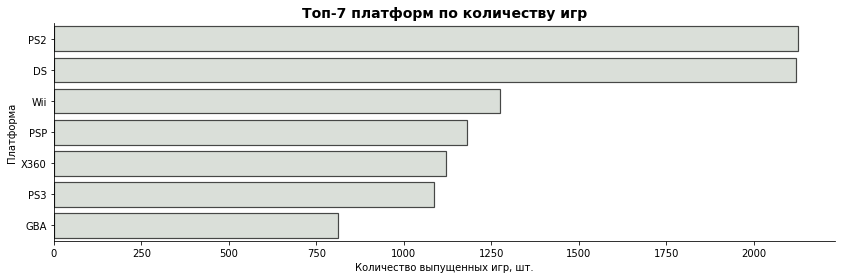

In [48]:
# построим график с помощью библиотеки seaborn
plt.figure(figsize=(14,4))
sns.barplot(
            y='platform', 
            x='games_cnt', 
            data=top_platform.sort_values(by='games_cnt', ascending=False), 
            #palette='mako',
            color='#CAD3C8',
            ec='black', linewidth=1.2,
            alpha=0.7)
plt.title('Топ-7 платформ по количеству игр',
         fontsize = 14, fontweight ='bold')
plt.xlabel('Количество выпущенных игр, шт.')
plt.ylabel('Платформа')

#remove the right and top borders
sns.despine()
plt.show();

Итоги раздела.<br>
В датафрейме проведена категоризация игр по оценкам пользователей и по оценкам критиков. Эта информация отражена в столбцах:
 - `'user_category'` - поле содержит информацию о категории игры по оценкам пользователей, где:
     - высокая оценка (от 8 до 10 включительно),
     - средняя оценка (от 3 до 8, не включая правую границу интервала) и
     - низкая оценка (от 0 до 3, не включая правую границу интервала).
 - `'critic_category'` - - поле содержит информацию о категории игры по оценкам критиков, где:
    - высокая оценка (от 80 до 10 включительно), 
    - средняя оценка (от 30 до 80, не включая правую границу интервала) и 
    - низкая оценка (от 0 до 30, не включая правую границу интервала).<br> 

Игроки склонны ставить больше высоких и низких оценок, чем критики. Критикам свойственно больше ставить средних оценок. 

Определили топ -7 платформ по количеству выпущенных игр это:

| Место в топ-7| Платформа | % игр|
|--------------|-----------|------|
|  1  |  PS2 |  **22%**  |
|  2  |  DS  |   **22%** |
|  3  |  Wii | 13%  |
|  4  |  PSP |   12% |
|  5  |  X360|12%   |
|  6  |  PS3 | 11%  |
|  7  |  GBA | 8%  |

---

## 5. Итоговый вывод <a class="tocSkip">

Изучили общую информацию и выполнили предобработку данных.

Произведена замена названий столбцов — приведение в нижний регистр.
Были удалены строки с пропусков в названии игры и с годом выпуска игры, так как это важная для исследования информация. Пропуски в столбце `rating` заменены на строковое значение — `unknown`, а устаревшую маркировку рейтинга `К-А` заменили на современное обозначение `Е`.

В столбцах с рейтингом игроков и рейтингом критиков `'user_score'`, `'critic_score'` пропуски оставили, так как адекватной замены для заполнения пропуска нет. Наличие пропуска в данном случае - также информация.

В ходе обработки датафрейма, проведена нормализация данных с текстовыми значениями в столбце  `'genre'`, так как они были написаны в разных вариантах регистра.

Удалены явные дубликаты `235` строк.

Всего из датафрейма в ходе обработки удалено строк с пропусками и/или дубликатами `512` штук. Потери от изначального количества строк `3.02 %`.

После очистки от дубликатов и критичных пропусков, датафрейм `df` содержит `16444` строк с историческими данными по играм за `37 лет` с `1980 по 2016 год`.<br>


Итогом среза данных о продаже игр за период с 2000 по 2013 стал датафрейм `df_actual` за `14 лет`, содержащий `12781` строк 13 столбцов, включая два столбца, которые были добавлены с категориями оценки игр пользователей и критиков:

 - `'user_category'` - поле содержит информацию о категории игры по оценкам пользователей, где:
     - высокая оценка (от 8 до 10 включительно),
     - средняя оценка (от 3 до 8, не включая правую границу интервала) и
     - низкая оценка (от 0 до 3, не включая правую границу интервала).
 - `'critic_category'` - - поле содержит информацию о категории игры по оценкам критиков, где:
    - высокая оценка (от 80 до 100 включительно), 
    - средняя оценка (от 30 до 80, не включая правую границу интервала) и 
    - низкая оценка (от 0 до 30, не включая правую границу интервала).<br> 
    
Игроки дали больше высоких и низких оценок в процентном соотношении к оцененным играм, чем критики.  Высокую оценку от игроков получили 35.3% оцененных игр, а критики поставили только 23,6% играм высокую оценку.При этом критики оценили всего 0,8% игр на назкую оценку, а у игроков игр, оцененных на низкий балл больше в 2 раза - 1,8%.    
    
Определили топ-7 платформ по количеству выпущенных игр - это:
это:

| Место в топ-7| Платформа | % игр|
|--------------|-----------|------|
|  1  |  PS2 |  **22%**  |
|  2  |  DS  |   **22%** |
|  3  |  Wii | 13%  |
|  4  |  PSP |   12% |
|  5  |  X360|12%   |
|  6  |  PS3 | 11%  |
|  7  |  GBA | 8%  |

Срез данных за требуемый период подготовлен. Можно приступать к исследованиям для написания статьи по обзору игровых платформ за период с 2000 по 2013 год.